In [11]:
'''

The following two functions do
Import the txt and merge them 
--
    ‘Merge’ sectorcode with the purpose.csv to bring in the column macro_sector
    ‘Merge’ (donorcode & agencycode) with the donor.csv to bring the columns is_ppd is_wbg
    Collapse sum (USD 5 measure) by (Year, RecipientCountry, macro_sector, is_ppd, is_wbg)

'''


print(__doc__)

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas

import argparse

import re




def merge_CRStxt_files(ArrayVal):

    
    tempArray = []
    finalMerged = pd.DataFrame()
    
 
    for eachFile in ArrayVal:
        
        tempArray.append(pd.read_table(eachFile, sep = "|", encoding='latin-1', low_memory=False))
        
        
    for pdFiles in tempArray:
        
        finalMerged = pd.concat([pdFiles, finalMerged])
        
    return finalMerged 



def merge_and_collapse(donors_classification, sector_groups, CRS_data, groupbyCols, colsForSummation, mergeON):


    donorsClassification = pandas.read_csv(donors_classification, low_memory=False)

    sectorData = pd.read_csv(sector_groups, low_memory=False)

    sectorData = sectorData.rename(columns= {'mmg_purpose_code':'SectorCode'})

    mergedFile_donorClass_and_CRSdata = pd.merge(donorsClassification, CRS_data, on = mergeON)
     
    finalMerged = pd.merge(sectorData, mergedFile_donorClass_and_CRSdata, on = ["SectorCode"])
    
    print(finalMerged.keys())
    
    sumOverTheYears = finalMerged.groupby(groupbyCols, as_index = False)[colsForSummation].sum()
    
    return sumOverTheYears



CRS_Data = merge_CRStxt_files(["CRS 2002-03 data.txt", "CRS 2004-05 data.txt", "CRS 2006 data.txt", "CRS 2008 data.txt", "CRS 2010 data.txt", "CRS 2011 data.txt", "CRS 2013 data.txt","CRS 2014 data.txt", "CRS 2015 data.txt", "CRS 2016 data.txt",  "CRS 2019 data.txt", "CRS 2020 data.txt"])

#print(CRS_Data.keys())

combinedDataForAnalysis = merge_and_collapse('OECD_CRS_donors_classification_UTF8Aben.csv', "MMG_sector_groups.csv", CRS_Data, ['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG', 'DonorCode'],['USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl', 'USD_Disbursement_Defl'], ["DonorCode", "AgencyCode"] )


print(combinedDataForAnalysis.keys())

combinedDataForAnalysis








The following two functions do
Import the txt and merge them 
--
    ‘Merge’ sectorcode with the purpose.csv to bring in the column macro_sector
    ‘Merge’ (donorcode & agencycode) with the donor.csv to bring the columns is_ppd is_wbg
    Collapse sum (USD 5 measure) by (Year, RecipientCountry, macro_sector, is_ppd, is_wbg)


Index(['Year', 'DonorCode', 'DonorName', 'AgencyCode', 'AgencyName', 'CrsID',
       'ProjectNumber', 'InitialReport', 'RecipientCode', 'RecipientName',
       'RegionCode', 'RegionName', 'IncomegroupCode', 'IncomegroupName',
       'FlowCode', 'FlowName', 'Bi_Multi', 'Category', 'Finance_t', 'Aid_t',
       'USD_Commitment', 'USD_Disbursement', 'USD_Received',
       'USD_Commitment_Defl', 'USD_Disbursement_Defl', 'USD_Received_Defl',
       'USD_Adjustment', 'USD_Adjustment_Defl', 'USD_AmountUntied',
       'USD_AmountPartialTied', 'USD_AmountTied', 'USD_AmountUntied_Defl',
       'USD_AmountPartialTied_Defl', 'USD_Amounttied_Defl', 'USD_IRTC',
       'USD_Ex

,Year,RecipientName,macro_sector,IsPPD,IsWBG,DonorCode,USD_Commitment,USD_Disbursement,USD_Commitment_Defl,USD_Disbursement_Defl
0,2002,Afghanistan,Agriculture,0,0,3,192.788193,0.000000,297.637413,0.000000
1,2002,Afghanistan,Agriculture,0,0,7,89.529729,95.223820,135.608301,144.232990
2,2002,Afghanistan,Agriculture,0,0,8,2.091330,2.093781,3.344323,3.348199
3,2002,Afghanistan,Agriculture,0,0,21,3.581196,3.581196,5.253101,5.253101
4,2002,Afghanistan,Agriculture,0,0,302,137.180000,8.303000,190.007220,11.500434
...,...,...,...,...,...,...,...,...,...,...
301626,2020,Zimbabwe,Other,0,0,55,2.588208,2.588208,2.837159,2.837159
301627,2020,Zimbabwe,Other,0,0,87,0.000000,0.960562,0.000000,1.116196
301628,2020,Zimbabwe,Other,0,0,546,0.000000,0.076400,0.000000,0.073282
301629,2020,Zimbabwe,Other,0,0,966,0.176766,0.176766,0.172158,0.172158


In [16]:
'''
the function below will filter the macroSectors we want to filter out. In this case, I chose to filter Education, Wash, and Health as given by the instruction. 

But I also made it non-manual for anyone to set the macrosector list they want to filter out.

'''
def macroSectorFilter(arrayVal, colsForSummation, groupby):
    
    filteredMacroSectorData = combinedDataForAnalysis[combinedDataForAnalysis.macro_sector.isin(arrayVal)]
    
    print(combinedDataForAnalysis.keys())
    
    sumOverTheYears = filteredMacroSectorData.groupby(groupby, as_index = False)[colsForSummation].sum()


    return sumOverTheYears


    
    
macroSectorFilter(['Health', 'Education', 'Wash'], ['USD_Commitment',  'DonorCode' ,'USD_Disbursement', 'USD_Commitment_Defl', 'USD_Disbursement_Defl'], ['macro_sector', 'IsPPD', 'IsWBG'])





Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG', 'DonorCode',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')


,macro_sector,IsPPD,IsWBG,USD_Commitment,DonorCode,USD_Disbursement,USD_Commitment_Defl,USD_Disbursement_Defl
0,Education,0,0,3.532312e+05,10242290,3.011890e+05,3.611533e+05,3.037179e+05
1,Education,1,0,4.699664e+04,1308168,5.126176e+04,4.654661e+04,4.887280e+04
2,Education,1,1,1.093080e+05,1601258,8.855306e+04,1.132689e+05,9.267136e+04
3,Health,0,0,1.167354e+06,14035232,1.045538e+06,1.245161e+06,1.109954e+06
4,Health,1,0,3.428756e+05,3019262,3.207269e+05,3.421577e+05,3.135297e+05
5,Health,1,1,2.011395e+05,1484633,1.579102e+05,2.075627e+05,1.653141e+05
6,Wash,0,0,8.697404e+05,6596368,5.643434e+05,8.802445e+05,5.694139e+05
7,Wash,1,0,3.207415e+05,1243622,2.500978e+05,3.162321e+05,2.425772e+05
8,Wash,1,1,4.018111e+05,1524163,3.014793e+05,4.089968e+05,3.086160e+05


In [3]:
'''
the function below will filter the macroSectors we want to filter out. In this case, I chose to filter Education, Wash, and Health as given by the instruction. 

But I also made it non-manual for anyone to set the macrosector list they want to filter out.

'''
def macroSectorFilter(arrayVal, colsForSummation, groupby):
    
    print( combinedDataForAnalysis.keys())
    
    filteredMacroSectorData = combinedDataForAnalysis[combinedDataForAnalysis.macro_sector.isin(arrayVal)]
    
    sumOverTheYears = filteredMacroSectorData.groupby(groupby, as_index = False)[colsForSummation].sum()


    return sumOverTheYears


    
    
macroSectorFilter(['Health', 'Education', 'Wash'], ['USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl', 'USD_Disbursement_Defl'], ['macro_sector', 'IsPPD', 'IsWBG'])





Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')


,macro_sector,IsPPD,IsWBG,USD_Commitment,USD_Disbursement,USD_Commitment_Defl,USD_Disbursement_Defl
0,Education,0,0,3.532312e+05,3.011890e+05,3.611533e+05,3.037179e+05
1,Education,1,0,4.699664e+04,5.126176e+04,4.654661e+04,4.887280e+04
2,Education,1,1,1.093080e+05,8.855306e+04,1.132689e+05,9.267136e+04
3,Health,0,0,1.167354e+06,1.045538e+06,1.245161e+06,1.109954e+06
4,Health,1,0,3.428756e+05,3.207269e+05,3.421577e+05,3.135297e+05
5,Health,1,1,2.011395e+05,1.579102e+05,2.075627e+05,1.653141e+05
6,Wash,0,0,8.697404e+05,5.643434e+05,8.802445e+05,5.694139e+05
7,Wash,1,0,3.207415e+05,2.500978e+05,3.162321e+05,2.425772e+05
8,Wash,1,1,4.018111e+05,3.014793e+05,4.089968e+05,3.086160e+05


In [4]:
macroSectorFilter(['Health', 'Education', 'Wash'], ['USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl', 'USD_Disbursement_Defl'], ['macro_sector'])


Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')


,macro_sector,USD_Commitment,USD_Disbursement,USD_Commitment_Defl,USD_Disbursement_Defl
0,Education,5.095359e+05,4.410039e+05,5.209688e+05,4.452621e+05
1,Health,1.711369e+06,1.524175e+06,1.794881e+06,1.588798e+06
2,Wash,1.592293e+06,1.115920e+06,1.605473e+06,1.120607e+06


In [5]:
macroSectorFilter(['Health', 'Education', 'Wash'], ['USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl', 'USD_Disbursement_Defl'], ['Year', 'macro_sector', 'IsPPD', 'IsWBG'])




Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')


,Year,macro_sector,IsPPD,IsWBG,USD_Commitment,USD_Disbursement,USD_Commitment_Defl,USD_Disbursement_Defl
0,2002,Education,0,0,11072.454081,6892.393189,16320.386916,10426.011635
1,2002,Education,1,0,1614.643423,562.347320,2201.821297,739.600952
2,2002,Education,1,1,5840.933905,4612.710849,8202.029709,6477.318959
3,2002,Health,0,0,26470.008032,19613.628198,38265.910745,28179.171082
4,2002,Health,1,0,5234.042364,3385.912701,6590.088602,4244.585225
...,...,...,...,...,...,...,...,...
115,2019,Wash,1,0,27389.738292,31202.635236,27389.738292,31202.635236
116,2019,Wash,1,1,36925.258560,40038.475836,36925.258560,40038.475836
117,2020,Education,0,0,1622.521423,1469.399238,1683.016156,1535.539261
118,2020,Health,0,0,22512.356035,10928.487696,21952.713342,10738.378002


In [134]:


dataForNetworkAnalysis = macroSectorFilter([ 'Education'], ['USD_Commitment', 'USD_Commitment_Defl', 'DonorCode' ], ['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG'])

print(dataForNetworkAnalysis.keys())

dataForNetworkAnalysis

Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG', 'DonorCode',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')
Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG',
       'USD_Commitment', 'USD_Commitment_Defl', 'DonorCode'],
      dtype='object')


,Year,RecipientName,macro_sector,IsPPD,IsWBG,USD_Commitment,USD_Commitment_Defl,DonorCode
0,2002,Afghanistan,Education,0,0,106.469800,168.272811,3058
1,2002,Afghanistan,Education,1,0,9.424180,14.093265,5
2,2002,Afghanistan,Education,1,1,37.350000,52.448088,905
3,2002,"Africa, regional",Education,0,0,127.921160,203.368172,2192
4,2002,"Africa, regional",Education,1,0,2.018870,2.445385,12
...,...,...,...,...,...,...,...,...
5459,2020,Viet Nam,Education,0,0,2.799044,2.729754,162
5460,2020,West Bank and Gaza Strip,Education,0,0,120.553894,123.152068,1109
5461,2020,Yemen,Education,0,0,0.520242,0.517106,217
5462,2020,Zambia,Education,0,0,0.127862,0.131100,56


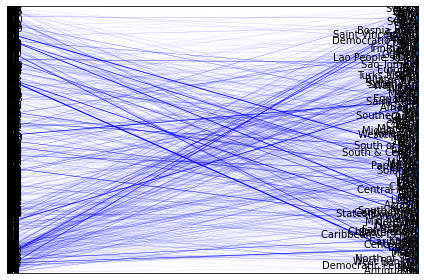

<Figure size 1e+10x1e+10 with 0 Axes>

In [135]:
import networkx as nx

import pandas as pd

import matplotlib.pyplot as plt

from networkx.algorithms import bipartite

def drawGraph(dataForNetworkAnalysis):
    

    B = nx.Graph()

    RecepientNameNode = []

    DonorCode = []

    tupleVal = []

    keyVal = 0

    Weight_from_USDCommitment = []

    for key, value in dataForNetworkAnalysis.iterrows():

        keyVal +=1

        RecepientNameNode.append(value[1])

        DonorCode.append(value[7])

        Weight_from_USDCommitment.append(value[5])

    for key, value in dataForNetworkAnalysis.iterrows():

        tupleVal.append((value[1], value[7]))

    B.add_edges_from(tupleVal, weight= Weight_from_USDCommitment)





    bipartite.is_bipartite(B)

    edges = B.edges()

    bipartite.is_bipartite(B)
    edges = B.edges()

    weightVal = [d['weight'] for _, _, d in B.edges(data=True)] [0]
    #print(weightVal)

    newWeight = []
    for i in range(len(weightVal)):

        newWeight.append(weightVal[i]/4000)


    #print(newWeight)


    nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, DonorCode), width = newWeight, edge_color= 'blue', node_size = 20, font_size=10, font_family="sans-serif")


    ax = plt.gca()
    ax.margins(0.00001)
    #plt.axis("off")
    plt.tight_layout()
    plt.figure(3,figsize=(1000000,1000000), dpi=10000) 
    plt.show()

    
drawGraph(dataForNetworkAnalysis)

#print(edges)
    
    

In [138]:


dataForNetworkAnalysis2 = macroSectorFilter([ 'Wash'], ['USD_Commitment', 'USD_Commitment_Defl', 'DonorCode' ], ['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG'])

dataForNetworkAnalysis2

Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG', 'DonorCode',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')


,Year,RecipientName,macro_sector,IsPPD,IsWBG,USD_Commitment,USD_Commitment_Defl,DonorCode
0,2002,Afghanistan,Wash,0,0,31.604640,49.116432,2179
1,2002,Afghanistan,Wash,1,0,113.090196,169.119168,5
2,2002,Afghanistan,Wash,1,1,195.775284,274.914036,905
3,2002,"Africa, regional",Wash,0,0,77.070972,110.114244,1760
4,2002,"Africa, regional",Wash,1,0,17.449968,21.136500,12
...,...,...,...,...,...,...,...,...
5146,2020,Uganda,Wash,0,0,13.963392,14.007876,997
5147,2020,Ukraine,Wash,0,0,0.410256,0.400212,1
5148,2020,Uzbekistan,Wash,0,0,4677.888000,4555.939620,1024
5149,2020,West Bank and Gaza Strip,Wash,0,0,8.340000,8.122584,977


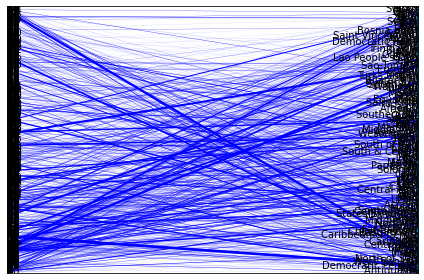

<Figure size 1e+10x1e+10 with 0 Axes>

In [137]:
drawGraph(dataForNetworkAnalysis2)

In [139]:

dataForNetworkAnalysis3 = macroSectorFilter([ 'Health'], ['USD_Commitment', 'USD_Commitment_Defl', 'DonorCode' ], ['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG'])

dataForNetworkAnalysis3

Index(['Year', 'RecipientName', 'macro_sector', 'IsPPD', 'IsWBG', 'DonorCode',
       'USD_Commitment', 'USD_Disbursement', 'USD_Commitment_Defl',
       'USD_Disbursement_Defl'],
      dtype='object')


,Year,RecipientName,macro_sector,IsPPD,IsWBG,USD_Commitment,USD_Commitment_Defl,DonorCode
0,2002,Afghanistan,Health,0,0,135.619427,201.870661,3527
1,2002,Afghanistan,Health,1,0,15.078688,22.549224,5
2,2002,"Africa, regional",Health,0,0,277.291152,422.776292,3251
3,2002,"Africa, regional",Health,1,0,2.245461,2.719845,12
4,2002,Albania,Health,0,0,58.351210,87.293047,3357
...,...,...,...,...,...,...,...,...
5539,2020,Viet Nam,Health,0,0,7.733625,7.531997,928
5540,2020,West Bank and Gaza Strip,Health,0,0,189.482833,186.332914,1980
5541,2020,Yemen,Health,0,0,8.693928,8.545564,2120
5542,2020,Zambia,Health,0,0,3.564877,3.471956,1005


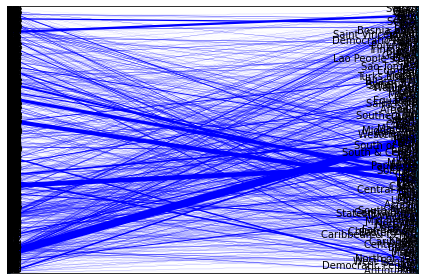

<Figure size 1e+10x1e+10 with 0 Axes>

In [140]:
    
drawGraph(dataForNetworkAnalysis3)